In [1]:
import tensorflow as tf
import numpy as np
import sys
sys.path.append('../')
import utils.preprocess as preprocess

In [2]:
pre = preprocess.preprocess("D:/DataSet/CICIDS2017/CSV/Wednesday-workingHours.pcap_ISCX.csv", labelColumnName='Label')
X_train, X_test, y_train, y_test = pre.preprocessing()

In [3]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [11]:
import utils.network.network7 as model
from utils.metrics import metric

In [12]:
net = model.MyLstmModel()

In [13]:
algorithm = tf.keras.optimizers.RMSprop(learning_rate=0.01, rho=0.9, momentum=0.89, epsilon=1e-07, centered=False, name='RMSprop')
net.compile(optimizer=algorithm, loss='categorical_crossentropy', metrics=metric())

In [14]:
from tensorflow.keras import callbacks
import datetime
dir_name = datetime.datetime.now().strftime("%Y%m%d-%H%M%S-network7-RMSprop")
logdir = os.path.join("../tensorboard", dir_name)
tensorboard_callback = callbacks.TensorBoard(logdir, histogram_freq=1)
# lrate = callbacks.LearningRateScheduler(opt_.exp_decay)

In [15]:
import numpy as np
model_ = net.fit(X_train, y_train, epochs=40, batch_size=512, validation_split=0.3, callbacks=[tensorboard_callback], verbose=1) # lrate

===================] - 12s 18ms/step - loss: 0.0821 - acc: 0.1776 - tp: 329572.0000 - fp: 13381.0000 - tn: 664195.0000 - fn: 9216.0000 - categorical_accuracy: 0.9673 - categorical_crossentropy: 0.0819 - precision: 0.9610 - recall: 0.9728 - auc: 0.9962 - val_loss: 0.0659 - val_acc: 0.3661 - val_tp: 141827.0000 - val_fp: 3806.0000 - val_tn: 286586.0000 - val_fn: 3369.0000 - val_categorical_accuracy: 0.9743 - val_categorical_crossentropy: 0.0657 - val_precision: 0.9739 - val_recall: 0.9768 - val_auc: 0.9965
Epoch 5/40
662/662 [==============================] - 12s 17ms/step - loss: 0.0795 - acc: 0.1925 - tp: 329687.0000 - fp: 12490.0000 - tn: 665086.0000 - fn: 9101.0000 - categorical_accuracy: 0.9686 - categorical_crossentropy: 0.0793 - precision: 0.9635 - recall: 0.9731 - auc: 0.9962 - val_loss: 0.0627 - val_acc: 0.3410 - val_tp: 141994.0000 - val_fp: 4663.0000 - val_tn: 285729.0000 - val_fn: 3202.0000 - val_categorical_accuracy: 0.9767 - val_categorical_crossentropy: 0.0625 - val_precis

In [16]:
from utils.evl_metrics import confusion_matrix, eva_metric
y_pred = net.predict(X_test)
y_class = np.argmax(y_pred, axis=1)
y_label = np.argmax(y_test, axis=1)
confusion_matrix(y_label, y_class)
eva_metric(y_label, y_class)


TrueNegatives result:  128460.0
TruePositives result:  73360.0
FalseNegatives result:  2088.0
FalsePositives result:  3514.0
Recall result:  0.9723253
Precision result:  0.95428884


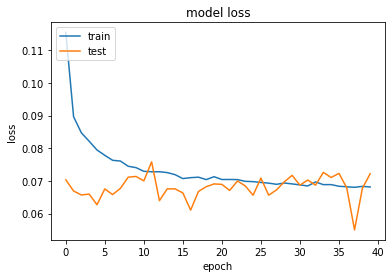

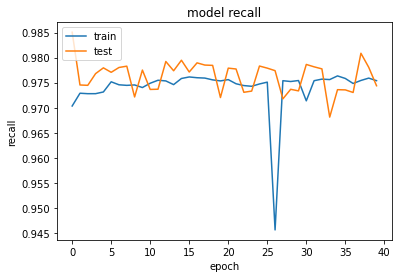

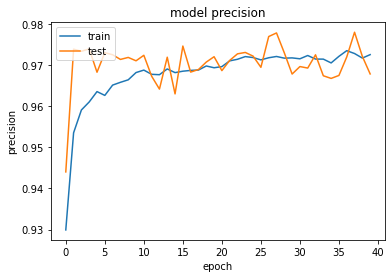

In [17]:
import utils.graph as fig
fig.add_dir(dir_name)
fig.loss_graph(model_,dir_name)
fig.recall_graph(model_,dir_name)
fig.precision_graph(model_,dir_name)